<a href="https://colab.research.google.com/github/Fidel-Leanne/pyTorch/blob/master/pyTorchWorkflowFundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


torch.__version__

'2.0.1+cu118'

Data preparation and loading(turning data into tensors)

Data can be


1.   Excel spreadsheet
2.   images
3.   DNA
4.   text
5.   videos
6.   audio
  lets showcase known data using linear regression




In [2]:
#create known parameter

weight = 0.9
bias= 0.4

# create

start = 0
end =1

step =0.02
X= torch.arange(start , end, step).unsqueeze(dim=1)
y= weight *X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4180],
         [0.4360],
         [0.4540],
         [0.4720],
         [0.4900],
         [0.5080],
         [0.5260],
         [0.5440],
         [0.5620]]))

In [3]:
len(X), len(y)

(50, 50)

Split data into training , validation and testing data

In [4]:
#create a train/test split

train_split= int(0.8*len(X))
X_train, y_train= X[:train_split] , y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

how to visualise our data

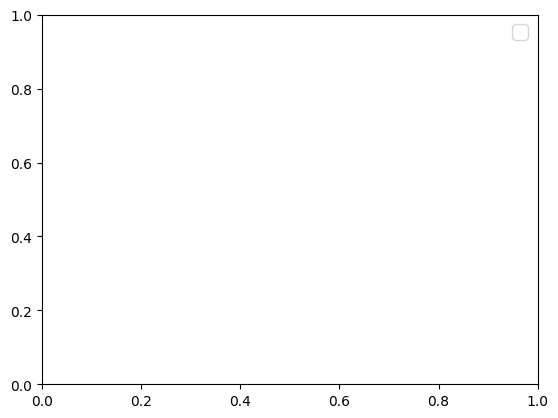

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels= y_train,
                     test_data=X_test,
                     test_labels= y_test,
                     predictions= None):

 plt.figure(figsize=(10, 7))
 #plot training data in blue
 plt.scatter(train_data, train_labels, c="b" , s= 4, label="Training data")

 #plotting testing data in green
 plt.scatter(test_data, test_labels, c="g" , s=4, label=("Testing data"))

 #are there any predictions
 if predictions is not None:
  #plot predictions
  plt.scater(test_data, predictions, c="r", s=4, label=("predictions"))
#show the legend
plt.legend(prop={"size": 14});

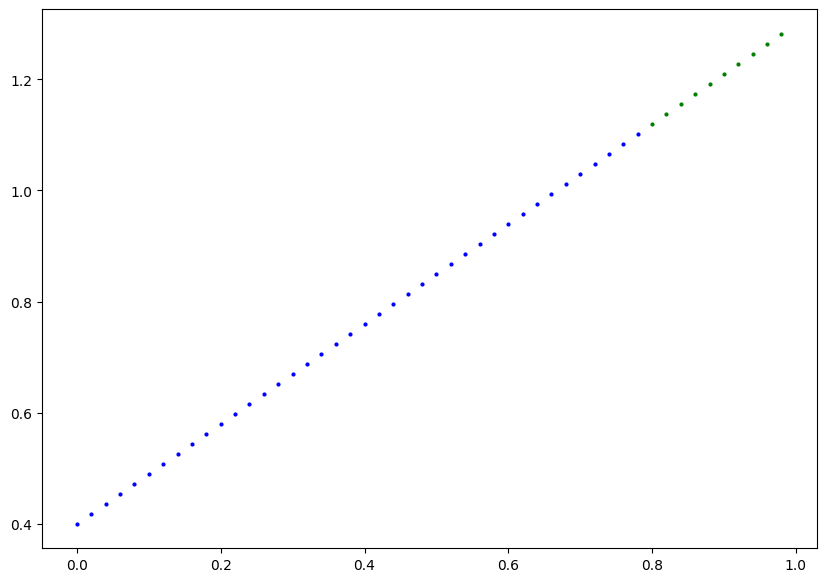

In [6]:
plot_predictions();

Building a PyTorch Model

> Starts with random values
> looks at training data

uses two algorithms
1. Gradient descent
2. Backpropagation



In [8]:
#create linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self) :
   super().__init__()
   self.weight= nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

   self.bias=nn.Parameter(torch.randn(1,
                                      requires_grad=True,
                                      dtype=torch.float))

#forward method is to define the computation in the model
   def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.weight* x +self.bias


### PyTorch model building essentials


torch.nn
torch.nn.Parameter
torch.nn.Module

1.   List item
2.   List item



In [15]:
##Checking the contents of our model
#Create a random seed

torch.manual_seed(42)


#Create an instacne of the model (this is the subclass of the nn module)
model_0=LinearRegressionModel()

#Checkout the parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
weight , bias

(0.9, 0.4)